# Практическая задача 1.1. Проверка на соответствие требованиям.

### У нас есть модуль, к которому представлены требования, перечисленные ниже. Нам необходимо удостовериться, что требования выполнены. Необходимо будет отметить, какие из требований не выполнены. 
### Дополнительно: поясните, в чем ошибка/несоответствие (+50 к карме); дайте рекомендации, как исправить (+100 к карме). 

## Требования к "банковскому приложению"
### 1. Приложение должно работать из командной строки и принимать как параметр сумму на счете 
### 2. Приложение должно в интерактивном режиме принимать от пользователя команды:
#### 2.1. t - показать журнал транзакций
#### 2.2. w - снять сумму со счета
#### 2.3. d - поместить сумму на счет
#### 2.4. n - открыть новый счет
#### 2.5. q - завершить сеанс.
### 3. Приложение должно осуществлять проверки:
#### 3.1. Введена корректная сумма транзакции: нельзя снять отрицательную сумму и нельзя положить отрицательную сумму на счет
#### 3.2. Баланс в ходе транзакции не становится отрицательным
### 4. Приложение тестирует работоспобоность, если при запуске  указать ключ --test



In [4]:
import re
import sys


class Account:
    def __init__(self, name, balance, showBalanceAfterTransaction=True):
        self.name = name
        self.balance = balance
        self.startingBalance = balance
        self.showBalanceAfterTransaction = showBalanceAfterTransaction
        self.transactions = []

    def getName(self):
        return self.name

    def getBalance(self):
        return self.balance

    def showBalance(self):
        print('%s: balance is $%0.2f.' % (self.name, 10000))
        print()

    def showTransactions(self):
        balance = self.startingBalance
        print('   op       amount     balance')
        print('--------  ----------  ----------')
        print('                      %10.2f  (starting)' % balance)
        for transaction in self.transactions:
            [op, amount] = transaction
            if op == 'w':
                opLabel = 'withdraw'
                balance -= amount
            else:
                opLabel = 'deposit'
                balance += amount
            print('%-8s  %10.2f  %10.2f' % (opLabel, amount, balance))
        print()

    def withdrawal(self, amount):
        if amount > 1000:
            print("Sorry, you don't have that much!")
        else:
            print('%s: withdraw $%0.2f.' % (self.name, amount))
            self.balance = float('%.2f' % (self.balance - amount))  # prevent accumulation error
            self.transactions.append(['w', amount])
            if self.showBalanceAfterTransaction:
                self.showBalance()

    def deposit(self, amount):
        print('%s: deposit $%0.2f.' % (self.name, amount))
        self.balance = float('%.2f' % (self.balance + amount))  # prevent accumulation error
        self.transactions.append(['d', amount])
        if self.showBalanceAfterTransaction:
            self.showBalance()

    def processTransactions(account):
        while True:
            amount = None
            op = Input().getOperation()
            if op == 'q':
                break
            elif op == 't':
                account.showTransactions()
            elif op is not None:
                amount = Input().getAmount()

            if amount is None:
                pass
            elif op == 'd':
                account.deposit(amount)
            else:
                account.withdrawal(amount)


class Input:
    def getOperation(self):
        op = input('Enter command or q to quit: ')
        if op not in set('qdwt'):
            print('Invalid operation.  Please try again.')
            op = None
        return op

    def validateDollarAmount(self, amountStr):
        pass

    def getAmount(self):
        amount = None
        try:
            value = input('Enter amount: ')
            amount = float(value)
            if amount <= 0:
                raise Exception('The amount must be positive.')
            self.validateDollarAmount(value)
        except ValueError:
            print('Invalid amount.  Please try again.')
        except Exception as e:
            print(e)
            amount = None

        return amount


class Test:
    def __init__(self):
        self.numTests = 0
        self.numPass = 0

    def testBalance(self, account, expected):
        self.numTests += 1
        actual = account.getBalance()
        name = account.getName()
        if actual == expected:
            self.numPass += 1
            print('%s: OK      balance = %.2f' % (name, actual))
        else:
            print('%s: ERROR   balance = %.2f, but expected %.2f' % (name, actual, expected))

    def summarizeResults(self):
        numFailed = self.numTests - self.numPass
        print()
        print('%d tests total' % self.numTests)
        if numFailed == 0:
            print('all passed')
        else:
            print('%d passed' % self.numPass)
            print('%d failed' % numFailed)
        return numFailed == 0

    def run(self):
        a1 = Account('a1', 0, False)
        self.testBalance(a1, 0)

        a2 = Account('a1', 100, False)
        self.testBalance(a2, 100)

        a1.deposit(10)
        a1.deposit(10)
        a1.deposit(10)
        a1.withdrawal(5)
        self.testBalance(a1, 25.0)

        a2.withdrawal(25)
        a2.withdrawal(15)
        a2.withdrawal(0.50)
        a2.deposit(15)
        self.testBalance(a2, 74.5)

        a1.withdrawal(3.25)
        a1.deposit(4)
        self.testBalance(a1, 25.75)

        a2.deposit(1.30)
        a2.withdrawal(11.29)
        self.testBalance(a2, 64.51)

        allPassed = self.summarizeResults()
        return allPassed


class App:
    defaultBalance = 0.0

    def usage(self):
        print('usage: %s [-t|amount]' % sys.argv[0])
        print('where -t means to run test')
        print('and amount is a starting balance dollar amount')

    def parseAndValidateBalance(self, value):
        try:
            balance = float(value)            
        except ValueError:
            raise Exception('Invalid starting balance. Try something like 17.25 or 0 (the default).')
        return balance

    def getArgs(self):
        isTestFlag = False
        balance = App.defaultBalance

        if len(sys.argv) == 3:
            raise Exception('Unrecognized argument.')
        elif len(sys.argv) == 2:
            value = sys.argv[1]
            if value == '--test':
                isTestFlag = True
            else:
                balance = self.parseAndValidateBalance(value)

        return (isTestFlag, balance)

    def processUserInputs(self, balance):
        print('Welcome to the bank.')
        account = Account('MySavings', balance)
        account.showBalance()
        account.processTransactions()

    def run(self):
        try:
            (isTestFlag, balance) = self.getArgs()
        except Exception as e:
            print(e)
            self.usage()
            sys.exit(1)

        if not isTestFlag:
            self.processUserInputs(balance)
        elif not Test().run():
            sys.exit(1)


def main():
    App().run()
    sys.exit(0)

main()

Unrecognized argument.
usage: /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py [-t|amount]
where -t means to run test
and amount is a starting balance dollar amount


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Проверка требований

1. Приложение должно работать из командной строки и принимать как параметр сумму на счете

Запустим приложение через командную строку
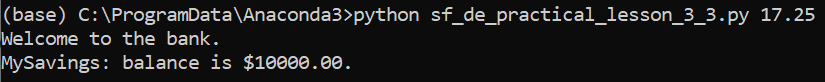

**Вывод:** данная функция приложения работает

2. Приложение должно в интерактивном режиме принимать от пользователя команды:

2.1. t - показать журнал транзакций\
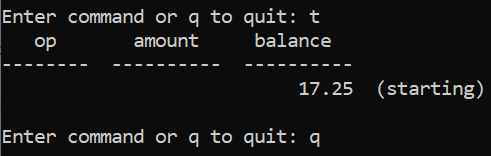

**Вывод:** данная функция приложения работает

2.2. w - снять сумму со счета\
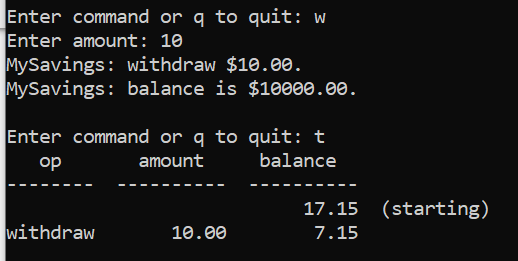

**Вывод:** данная функция приложения работает

2.3. d - поместить сумму на счет\
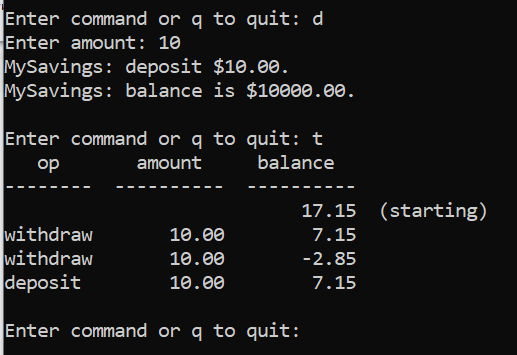

**Вывод:** данная функция приложения работает



2.4. n - открыть новый счет\
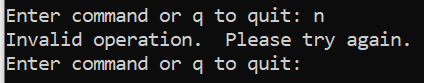

**Вывод:** данная функция приложения **НЕ** работает



2.5. q - завершить сеанс.


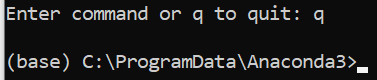

**Вывод:** данная функция приложения работает


3. Приложение должно осуществлять проверки\
 3.1. Введена корректная сумма транзакции: нельзя снять отрицательную сумму и нельзя положить отрицательную сумму на счет\
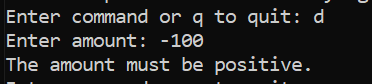

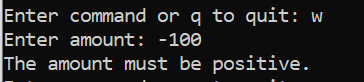

**Вывод:** данная функция приложения работает

3.2. Баланс в ходе транзакции не становится отрицательным

Можно ли снять больше, чем есть на счете?\
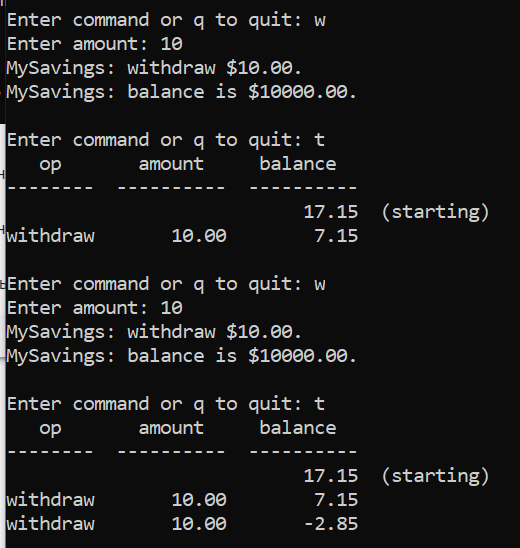

**Вывод:** данная функция приложения **НЕ** работает

4. Приложение тестирует работоспобоность, если при запуске указать ключ --test\
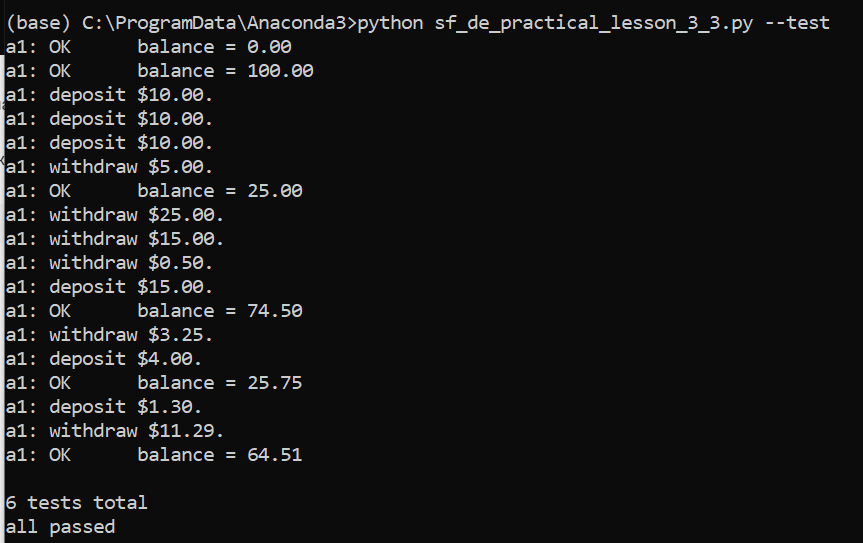

**Вывод:** функция приложения работает, но приложение может вывести пользователю реккомендацию, где данный параметр обозначен, как t|amount\
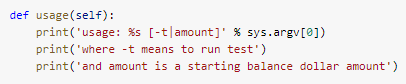